# Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import chart_studio.plotly as py
import plotly.graph_objs as go

pandas to manipulate data

matplotlib and seaborn for fast visualizations

plotly for interactive visualizations

# Importing and Exploring Data

In [3]:
dataset=pd.read_csv("iris-dataset.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [7]:
dataset.shape

(150, 4)

In [8]:
x=dataset[:]

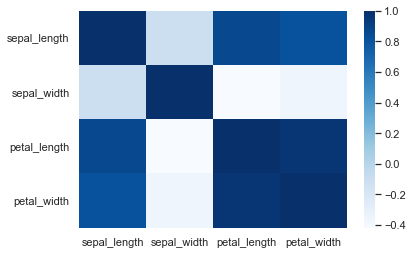

In [89]:
corr=dataset.corr()
sns.heatmap(corr,cmap="Blues")

The Given Dataset has 150 records


The number of features or independent variable is four

The Dataset has no missing values 

# K-Means Clustering Model

# Standardizing The Variables

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [30]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[600.0,
 223.73200573676348,
 140.965816630747,
 114.42970777082236,
 91.14860119459559,
 80.2306070450696,
 70.93964372756813,
 62.96758488325034,
 55.70641053075774]

The Elbow Method

This method is most useful in determining the optimum number of clusters

In [31]:
trace=go.Scatter(x=[i for i in range(1,10)],y=wcss,
                 mode="lines+markers",
                 marker=dict(size=12,color="red",opacity=0.8),
                 line=dict(color="blue"))

layout=go.Layout(title="The Elbow Method ",showlegend=True,
                 xaxis=dict(title="Number of CLusters"),
                 yaxis=dict(title="WCSS"))

fig=go.Figure(data=[trace],layout=layout)

iplot(fig)

Optimum number of  Cluster 3

In [32]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
clusters=kmeans.fit_predict(x)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [34]:
df=dataset.copy()
df["Cluster ID"]=clusters
df

,sepal_length,sepal_width,petal_length,petal_width,Cluster ID
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Visualizing The Clusters

In [70]:
trace=go.Scatter(x=df["sepal_length"],y=df["sepal_width"],
                 name="Cluster on basis of Sepal Features",
                 mode="markers",
                 marker=dict(size=12,
                             color=df["Cluster ID"],
                             opacity=1))



layout=go.Layout(title="Sepal Length vs Sepal Width",showlegend=True,
                 xaxis=dict(title="Sepal Length"),
                 yaxis=dict(title="Sepal Width"))

fig=go.Figure(data=trace,layout=layout)

iplot(fig)

In [71]:

trace=go.Scatter(x=df["petal_length"],y=df["petal_width"],
                 name="Cluster on basis of Petal Features",
                 mode="markers",
                 marker=dict(size=12,color=df["Cluster ID"],opacity=1))
                 
layout=go.Layout(title="Petal Length vs Petal Width",showlegend=True,
                 xaxis=dict(title="Petal Length"),
                 yaxis=dict(title="Petal Width"))

fig=go.Figure(data=trace,layout=layout)

iplot(fig)

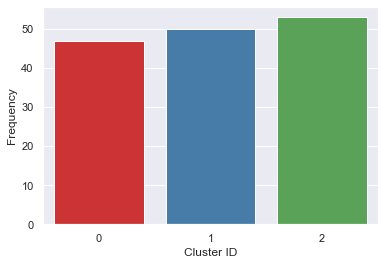

In [76]:
sns.countplot(df["Cluster ID"],palette="Set1")
plt.ylabel("Frequency")
plt.show()